In [2]:
from qiskit import IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

#Earlier IBMQ.save_account('TOKEN') needs to be run
IBMQ.load_accounts()

In [ ]:
qr = QuantumRegister(5)

In [7]:
meas_cals, state_labels = complete_meas_cal(qubit_list=[0,2], qr=qr)

In [48]:
len(meas_cals)

4

In [50]:
print(state_labels)

['00', '01', '10', '11']


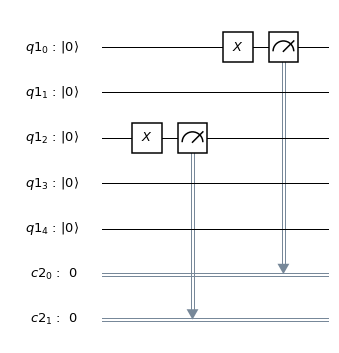

In [47]:
%matplotlib inline
meas_cals[3].draw(output='mpl')

In [51]:
backend = IBMQ.get_backend('ibmqx4')

In [16]:
job = execute(meas_cals, backend=backend, shots=1024)

In [32]:
job.status()

<JobStatus.QUEUED: 'job is queued'>

In [33]:
job.queue_position()

59

In [34]:
job.job_id()

'5cce0ca12e585300709f30b5'

In [35]:
from qiskit.tools.monitor import job_monitor
job_monitor(job, interval=5)

HTML(value="<p style='font-size:16px;'>Job Status: job is queued </p>")

In [36]:
cal_results = job.result()

In [37]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

In [55]:
print(meas_fitter.cal_matrix)

[[0.96386719 0.20019531 0.09765625 0.02246094]
 [0.01269531 0.78125    0.00585938 0.08691406]
 [0.0234375  0.00488281 0.8828125  0.18457031]
 [0.         0.01367188 0.01367188 0.70605469]]


In [62]:
print(meas_fitter.readout_fidelity())

0.83349609375


In [38]:
qr = QuantumRegister(5)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[2])
circuit.cx(qr[2], qr[0])
circuit.measure(qr[0], cr[0])
circuit.measure(qr[2], cr[1])

In [39]:
job2 = execute(circuit, backend=backend, shots=1024)

In [40]:
job_monitor(job2, interval=5)

HTML(value="<p style='font-size:16px;'>Job Status: job is queued </p>")

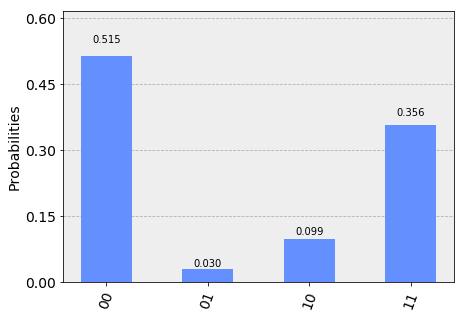

In [42]:
from qiskit.tools.visualization import plot_histogram
result = job2.result()
raw_counts=result.get_counts()

plot_histogram(raw_counts)

In [63]:
print(raw_counts)

{'10': 101, '00': 527, '11': 365, '01': 31}


In [66]:
raw_counts_vector = [527,31,101,365]
print(raw_counts_vector)

[527, 31, 101, 365]


In [73]:
import scipy.linalg as la
import numpy as np

corrected_vector = np.dot(la.pinv(meas_fitter.cal_matrix),
                          raw_counts_vector)*1000/1024
print(corrected_vector.flatten())

[528.3592447  -26.01350818  -7.84225193 505.49651541]


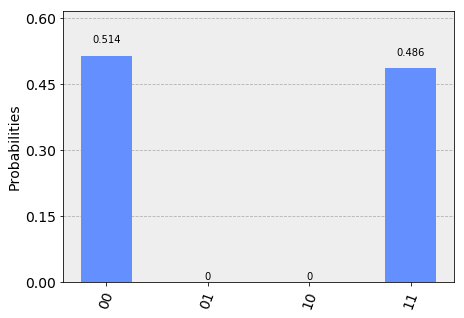

In [43]:
# Create a measurement filter from the calibration matrix
meas_filter = meas_fitter.filter

# Apply the filter to the raw counts to mitigate 
# the measurement errors
mitigated_counts = meas_filter.apply(raw_counts)

plot_histogram(mitigated_counts)

In [76]:
print(mitigated_counts)

{'00': 526.55295673202, '01': 3.4502643797562627e-12, '10': 6.075929689930426e-13, '11': 497.44704326797597}


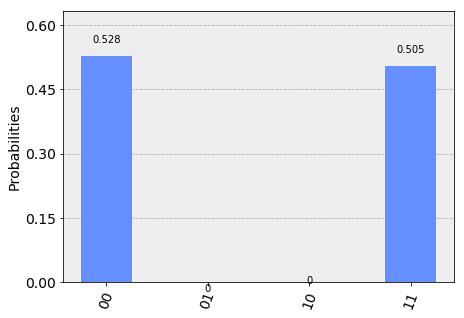

In [70]:
mitigated_counts2 = meas_filter.apply(raw_counts, 'pseudo_inverse')
plot_histogram(mitigated_counts2)

In [77]:
print(mitigated_counts2)

{'00': 541.0398665683862, '01': -26.637832372432694, '10': -8.030465975865619, '11': 517.6284317799118}


In [78]:
from qiskit.tools.jupyter import *
%qiskit_backend_monitor backend

C:\Users\TOMASZSTOPA\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqbackend.py:180: DeprecationWarning: Some jobs (4) are in a no-longer supported format. These jobs will stop working after Qiskit 0.7. Save the results or send the job with Qiskit 0.7+. Old jobs:
 - 5be9510117436b0052751cc8
 - 5be70d5b054f3d005ae77a6c
 - 5be706cfa9ff0f0053fa23a3
 - 5be705c6846b1b0052e14fc6
  DeprecationWarning)
